In [ ]:
'''

taken from http://stackoverflow.com/questions/27548363/from-voronoi-tessellation-to-shapely-polygons

build a voronoi tessellation from a random collection of points


If you're just after a collection of polygons you don't need to pre-order the point to build them.

The scipy.spatial.Voronoi object has a ridge_vertices attribute containing indices of vertices forming the lines of the Voronoi ridge. If the index is -1 then the ridge goes to infinity.

First start with some random points to build the Voronoi object.

'''

In [7]:
import numpy as np
import geopandas as gp
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
points = np.random.random((100, 2))
points

array([[ 0.11777686,  0.21420622],
       [ 0.57947757,  0.93713849],
       [ 0.11934582,  0.26728875],
       [ 0.05529978,  0.60795444],
       [ 0.52304411,  0.860675  ],
       [ 0.96941795,  0.76782494],
       [ 0.49457069,  0.98255491],
       [ 0.48881527,  0.04699408],
       [ 0.75346866,  0.47820609],
       [ 0.96301437,  0.80003574],
       [ 0.26271713,  0.72585338],
       [ 0.22229891,  0.97721309],
       [ 0.73430958,  0.96051806],
       [ 0.09294201,  0.70127624],
       [ 0.05816473,  0.79843163],
       [ 0.47994986,  0.97624738],
       [ 0.90883303,  0.25956433],
       [ 0.89016094,  0.79389773],
       [ 0.0328429 ,  0.41816017],
       [ 0.00345669,  0.80841961],
       [ 0.08135517,  0.05239198],
       [ 0.33798679,  0.45882866],
       [ 0.64963916,  0.10992639],
       [ 0.63030297,  0.80931318],
       [ 0.71010269,  0.9080236 ],
       [ 0.49562774,  0.85830346],
       [ 0.30909407,  0.25639335],
       [ 0.80435328,  0.33917588],
       [ 0.91787718,

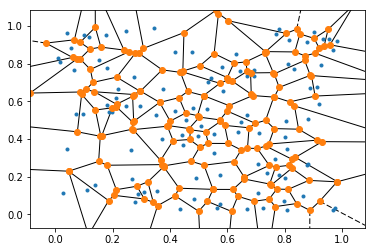

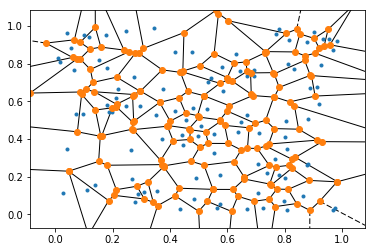

In [6]:
vor = Voronoi(points)
voronoi_plot_2d(vor)

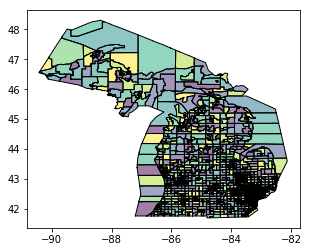

In [8]:
### plot voronoi polygons for michigan tract centroids
# read in shapefile

tracts = gp.read_file('tl_2016_26_tract/tl_2016_26_tract.shp')

In [9]:
tracts.head()

,ALAND,AWATER,COUNTYFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,MTFCC,NAME,NAMELSAD,STATEFP,TRACTCE,geometry
0,6254281,89019,023,S,26023951400,+41.9402199,-084.9851647,G5020,9514,Census Tract 9514,26,951400,"POLYGON ((-85.004627 41.932457, -85.0042639999..."
1,3377967,0,081,S,26081014000,+42.8916789,-085.6918312,G5020,140,Census Tract 140,26,014000,"POLYGON ((-85.70528899999999 42.884805, -85.70..."
2,1860262,0,081,S,26081014100,+42.8910862,-085.6720539,G5020,141,Census Tract 141,26,014100,"POLYGON ((-85.680808 42.884189, -85.6802359999..."
3,4467726,0,081,S,26081014200,+42.8980796,-085.6549735,G5020,142,Census Tract 142,26,014200,"POLYGON ((-85.665865 42.910559, -85.6625799999..."
4,4301981,5120,081,S,26081014300,+42.8705185,-085.6724366,G5020,143,Census Tract 143,26,014300,"POLYGON ((-85.68218899999999 42.878176, -85.68..."


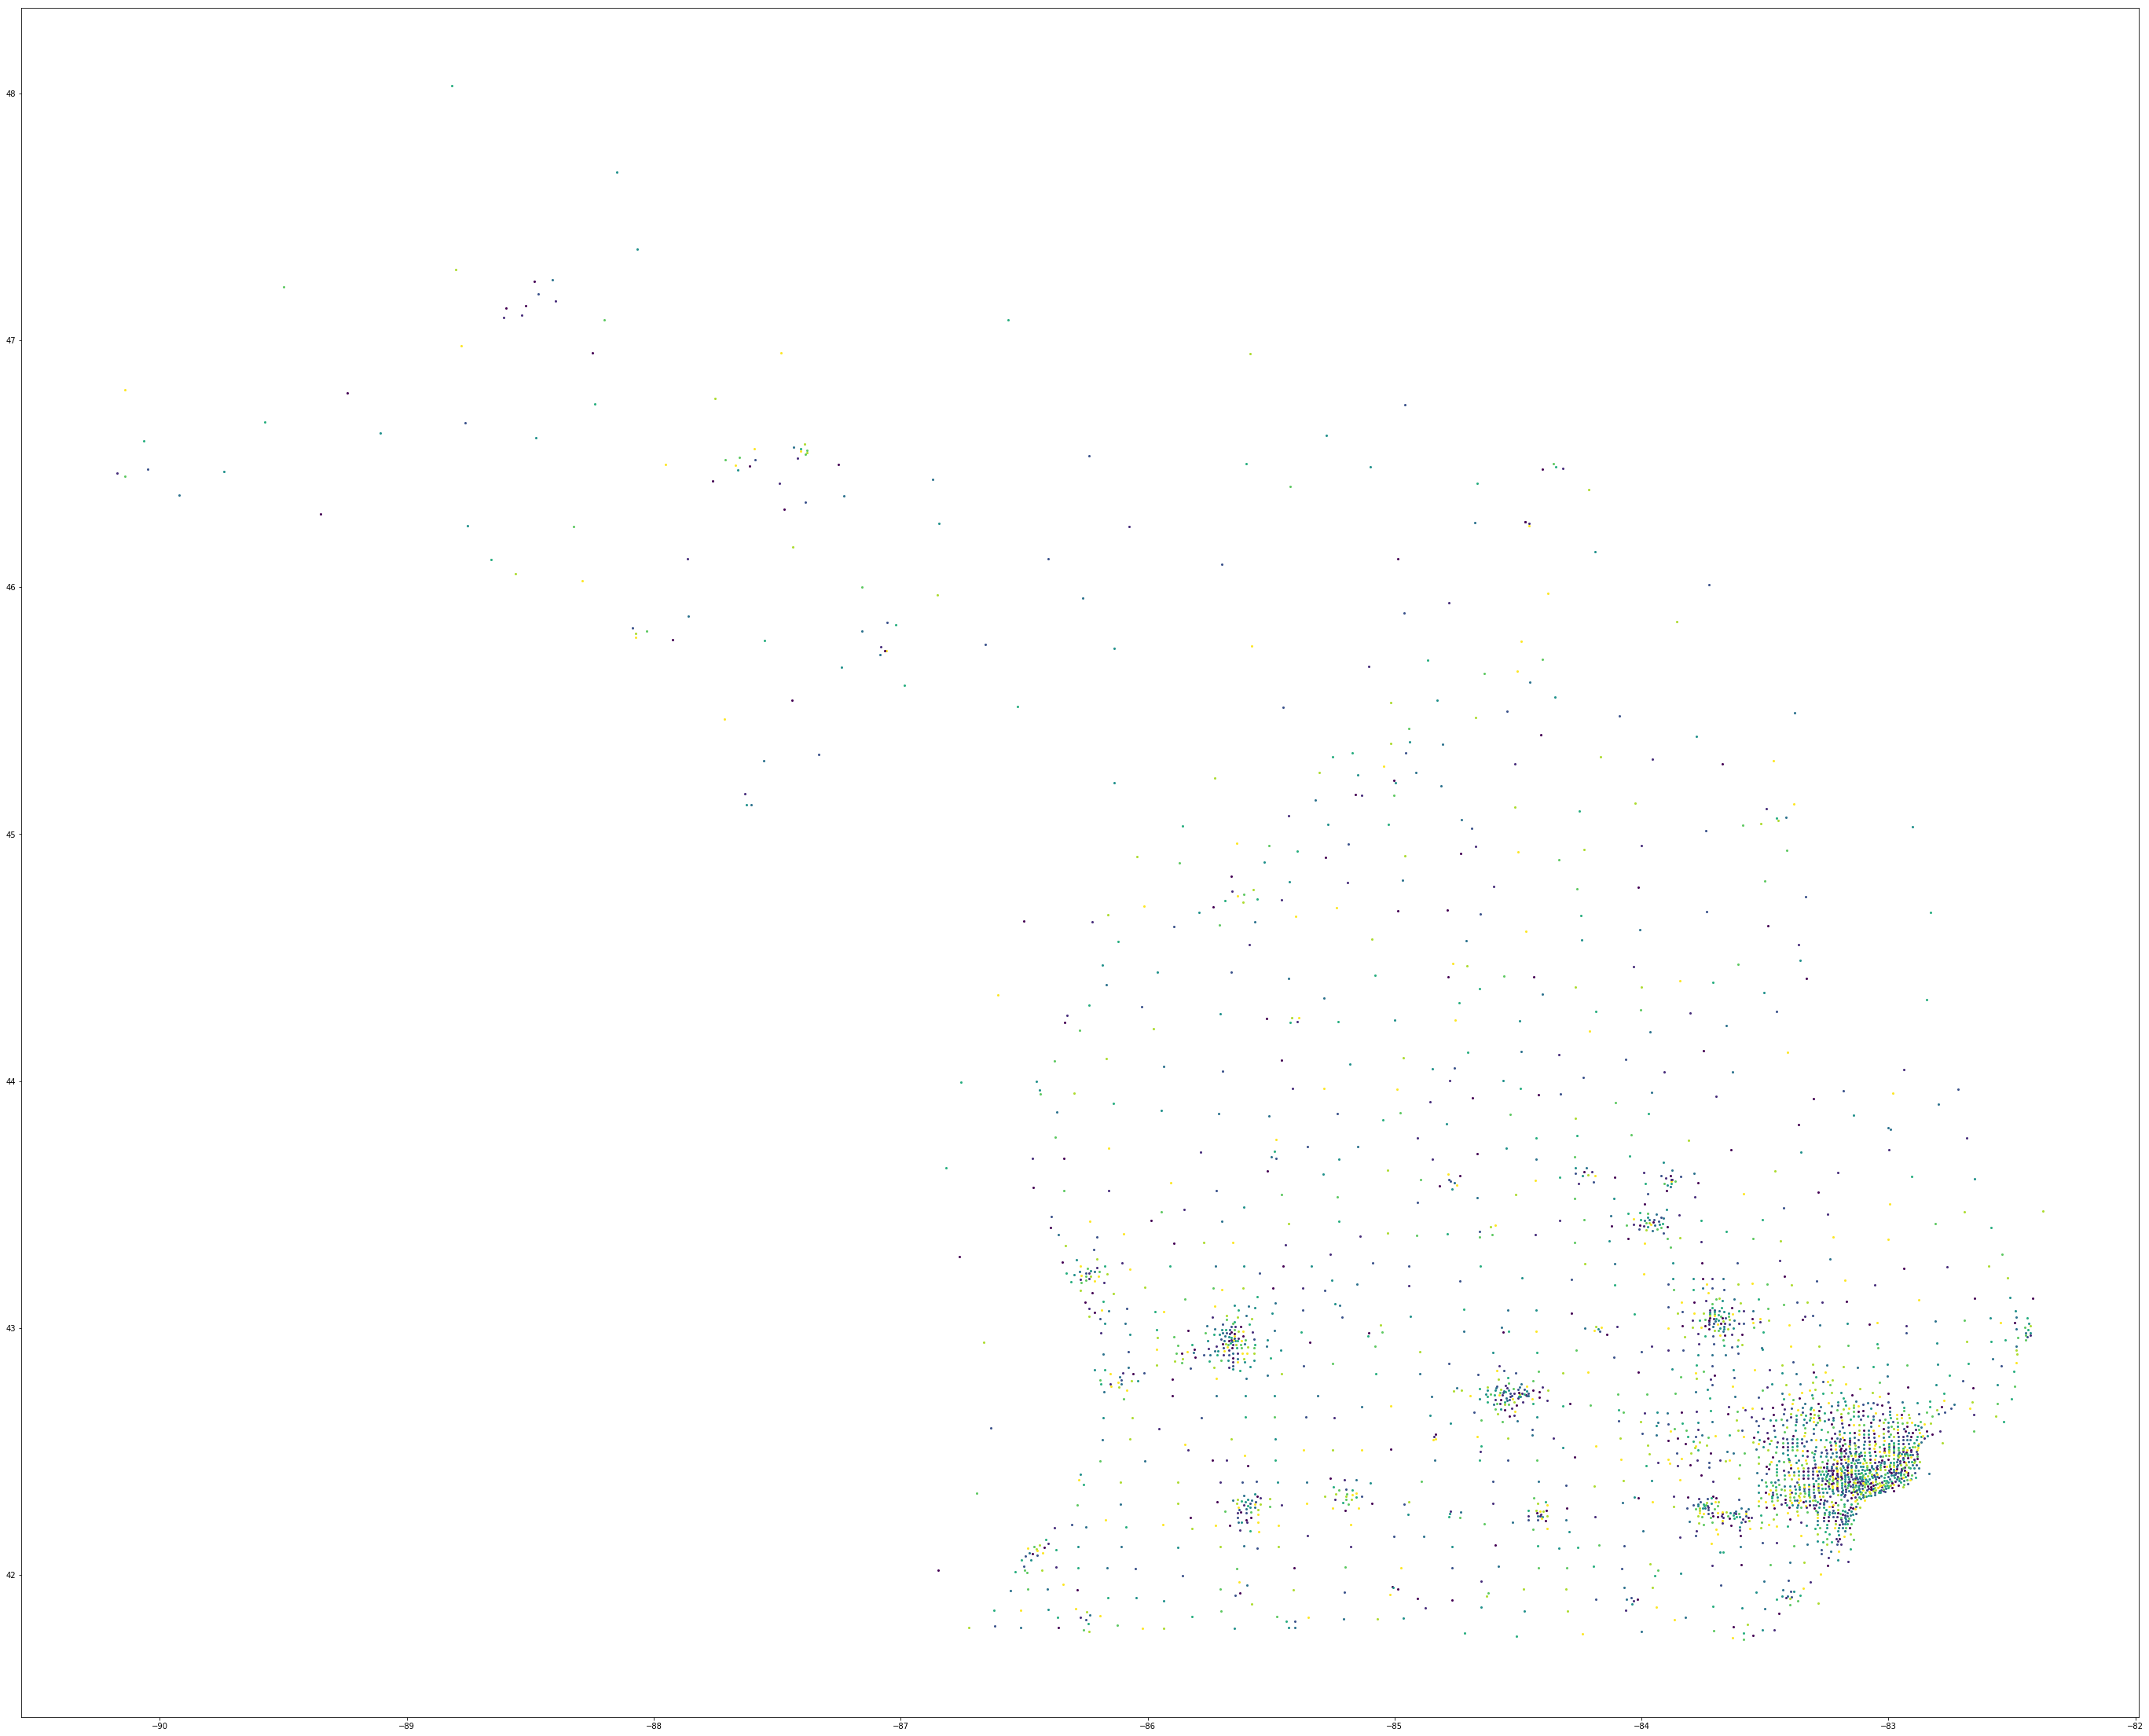

In [39]:
tracts['geometry'] = tracts.geometry.centroid
plt.rcParams["figure.figsize"] = (60,40)
tracts.plot()

In [36]:
# convert lat/longs to np array
tract_coordinates = np.empty([len(tracts), 2])
for i in range(len(tracts)):
    tract_coordinates[i] = [tracts.geometry[i].x, tracts.geometry[i].y]

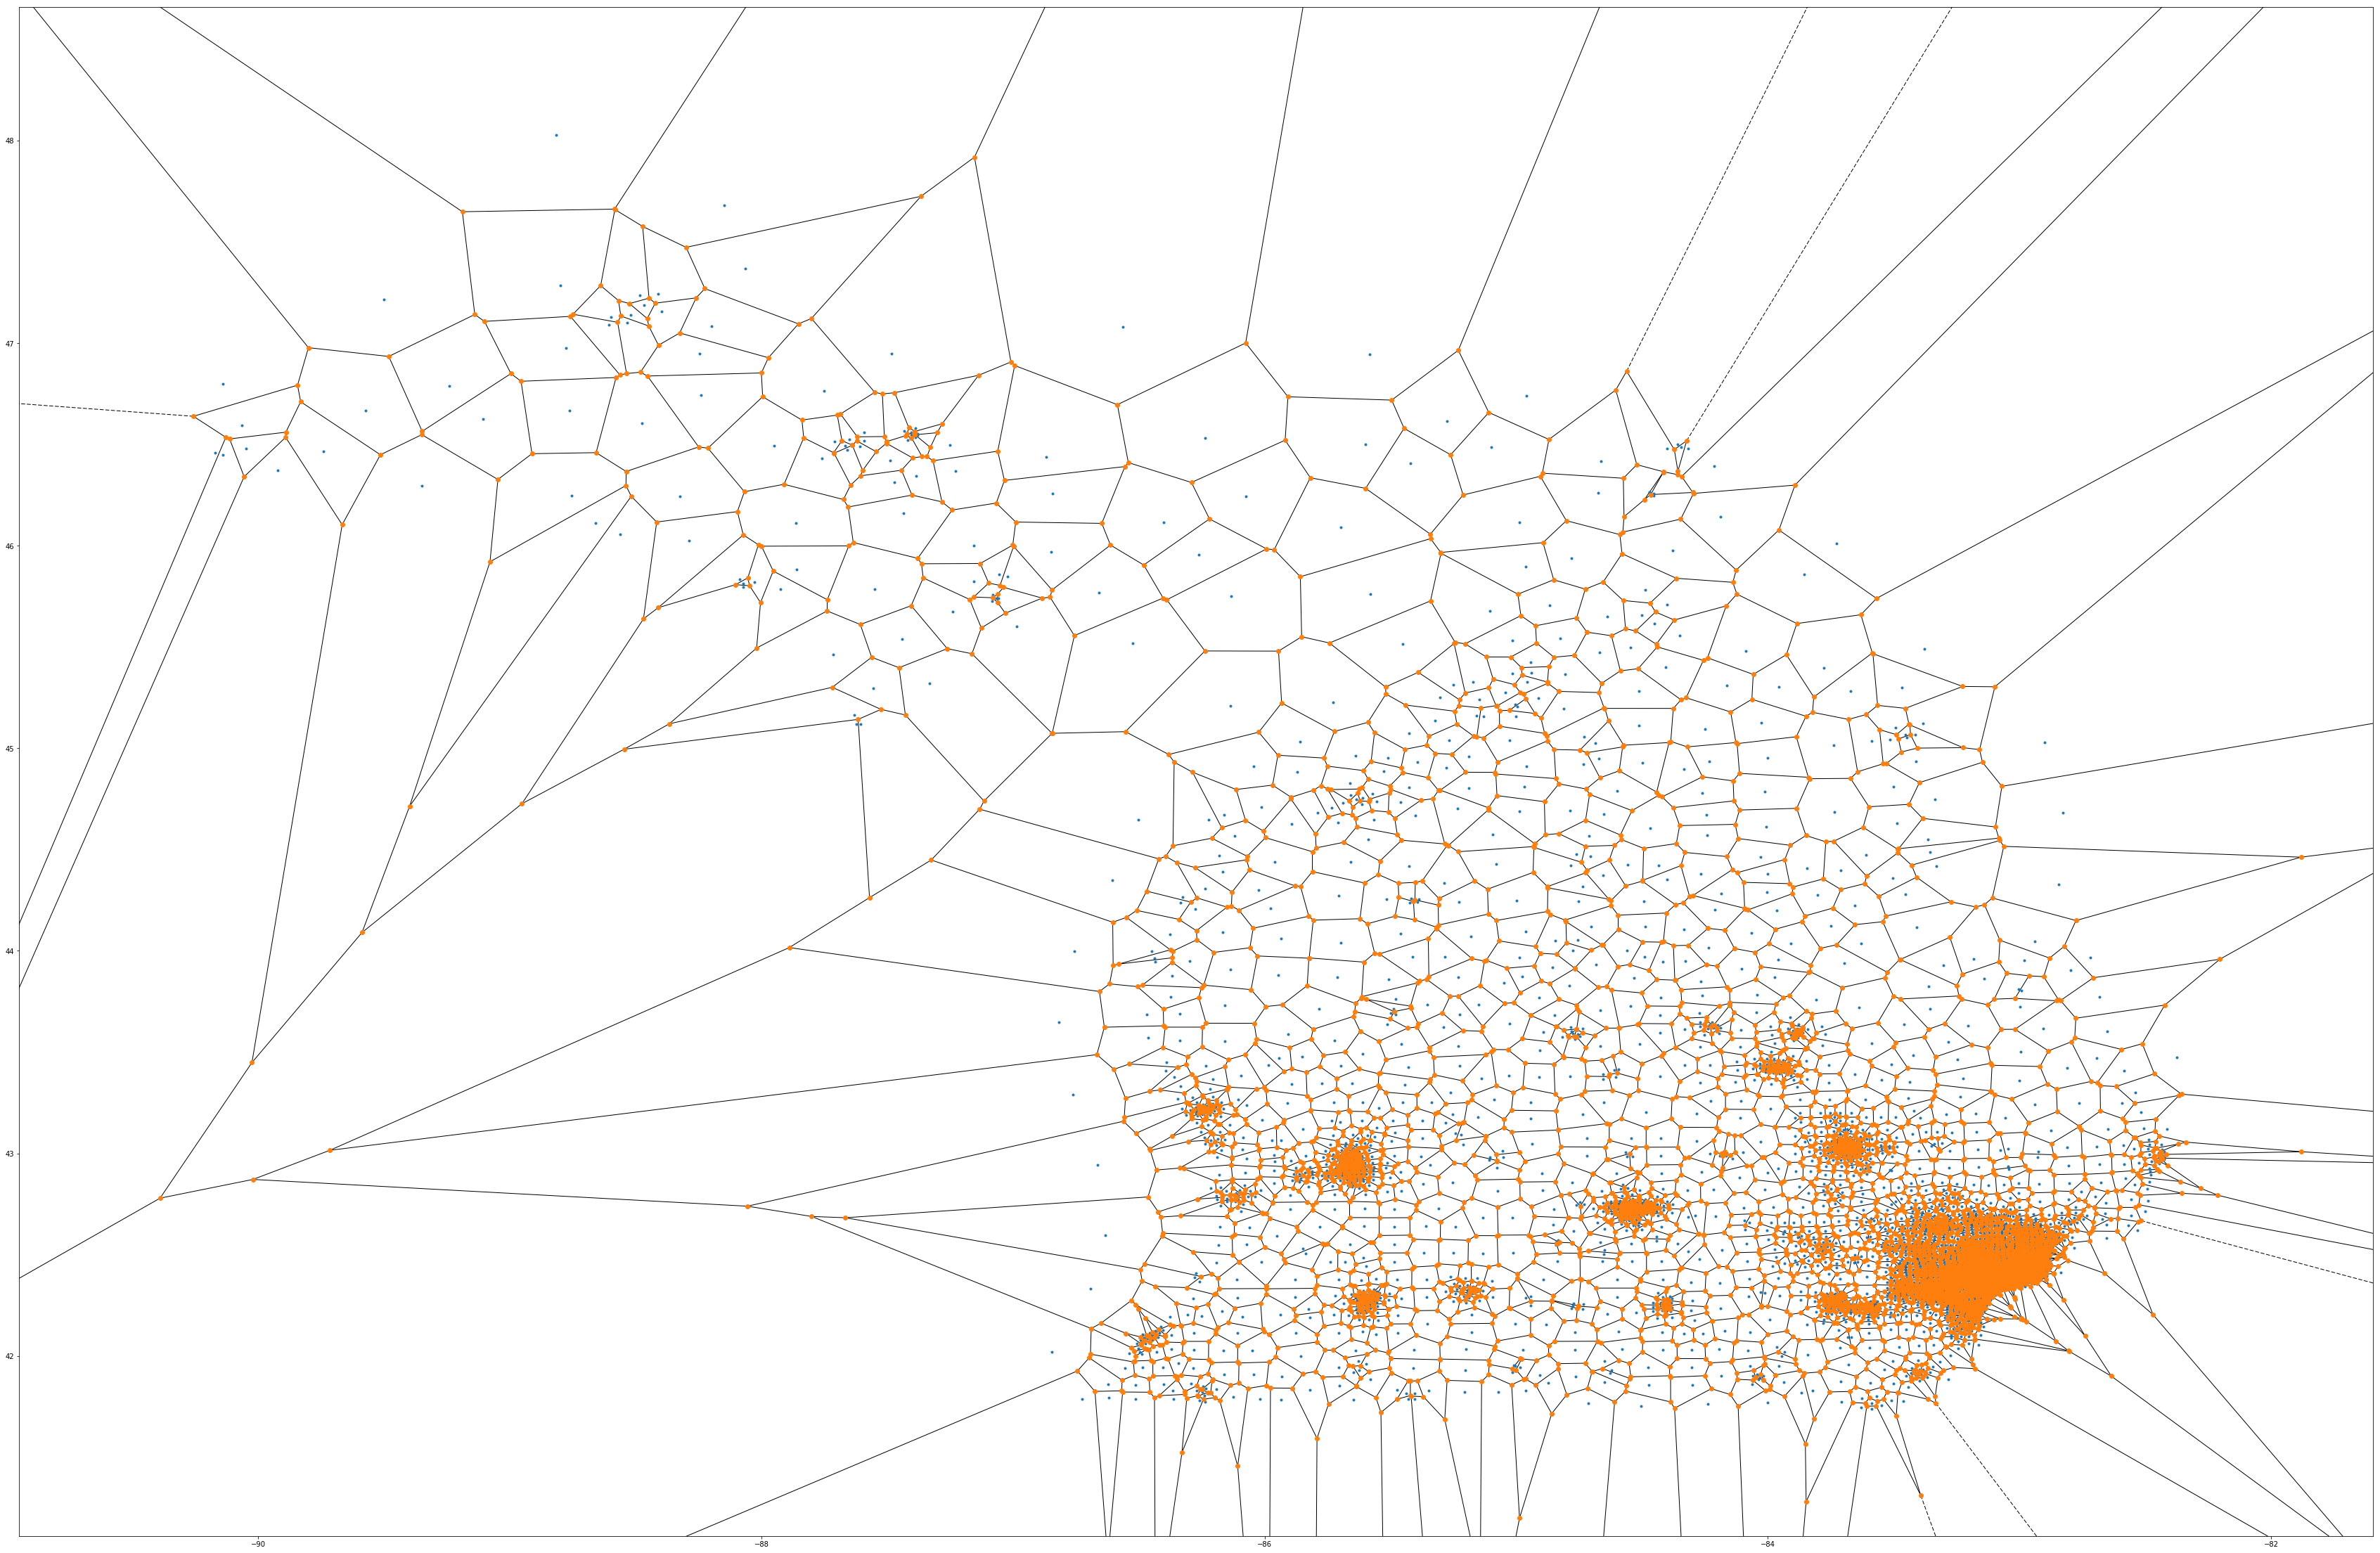

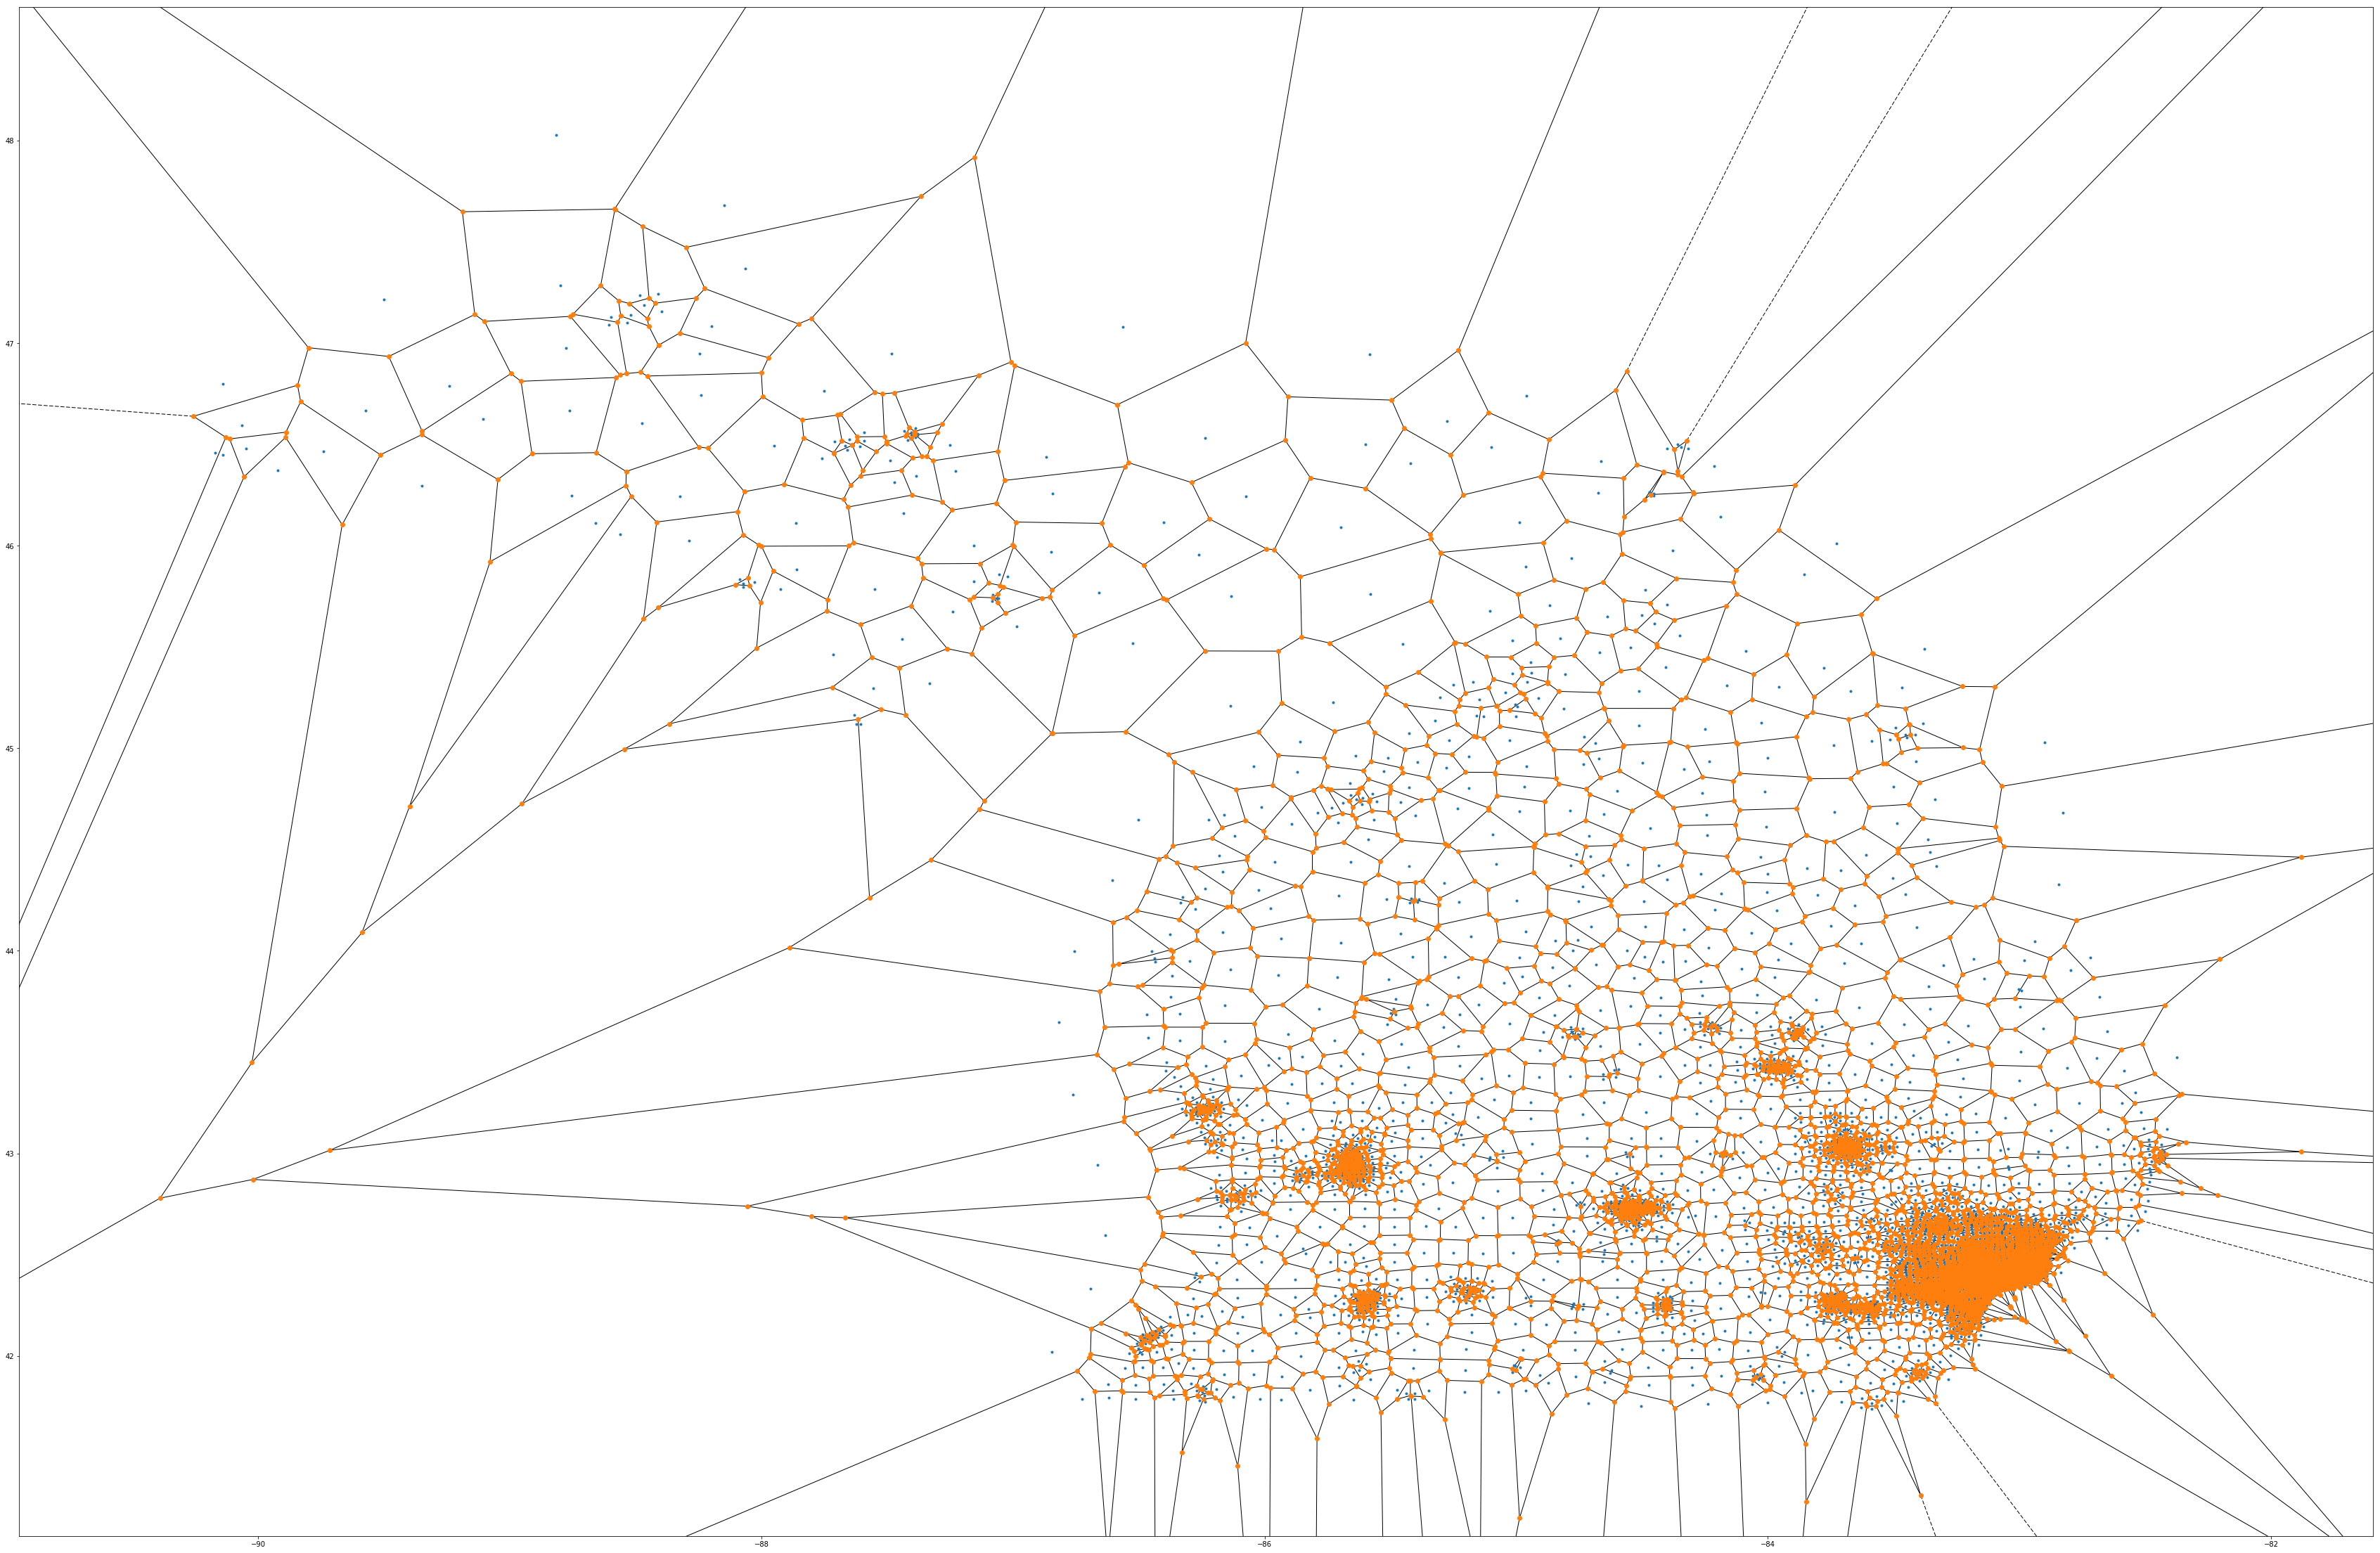

In [40]:
vor = Voronoi(tract_coordinates)
voronoi_plot_2d(vor)